In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster


In [2]:
iris=pd.read_csv("iris.csv")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


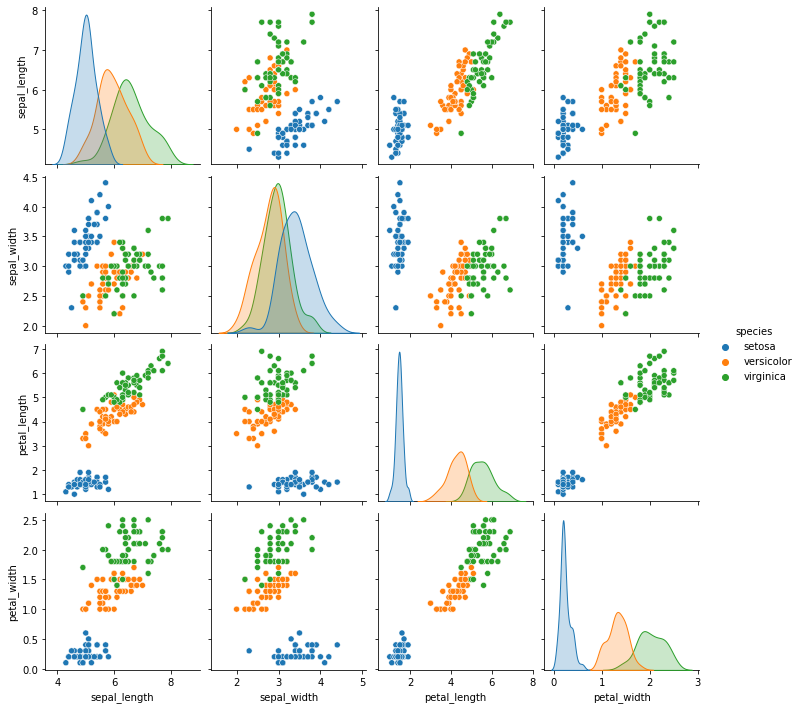

In [4]:
sns.pairplot(iris,hue="species")

In [5]:
#Let's pretend we don't have the species.
x = iris[iris.columns.difference(["species"])]
x

,petal_length,petal_width,sepal_length,sepal_width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


### k-means

In [6]:
#notice we don't have y
model=cluster.KMeans(n_clusters=3)
model.fit(x)
clusters_pred=model.predict(x)
print(clusters_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
#you can explore the model
model.

In [8]:
#returns sum of distances to the respective centroids
model.inertia_

78.94084142614601

In [9]:
# we could skip model.predict

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
model.cluster_centers_
#retruns the centroids

array([[4.39354839, 1.43387097, 5.9016129 , 2.7483871 ],
       [1.464     , 0.244     , 5.006     , 3.418     ],
       [5.74210526, 2.07105263, 6.85      , 3.07368421]])

In [11]:
centroids=model.cluster_centers_
centroids


array([[4.39354839, 1.43387097, 5.9016129 , 2.7483871 ],
       [1.464     , 0.244     , 5.006     , 3.418     ],
       [5.74210526, 2.07105263, 6.85      , 3.07368421]])

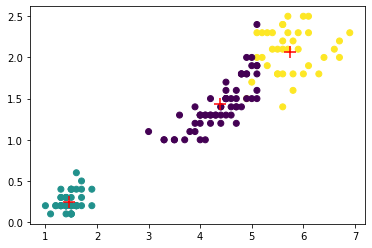

In [15]:
dims=[0,1] #change this and see other dimensions
plt.scatter(x.values[:,dims[0]],x.values[:,dims[1]],c=clusters_pred)
plt.scatter(centroids[:,dims[0]],centroids[:,dims[1]],marker="+",c="red",s=150)
plt.show()

In [16]:
x.values[:,dims[0]]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

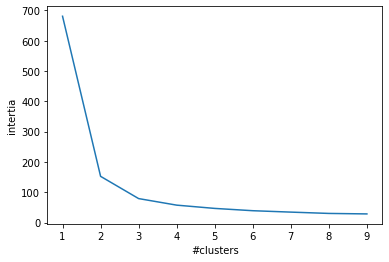

In [17]:
#cost function (inertia) vs number of clusters
inertias=[]

for k in np.arange(1,10):
    model=cluster.KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)
    
    
    
    
plt.plot(np.arange(1,10),inertias)
plt.xlabel("#clusters")
plt.ylabel("intertia")
plt.show()


- what is the best number of clusters?
- increasing k beyond 3 is not worth it. not much decrease in inertia for increasing model complexity. 



### Hierarchical Clustering

In [18]:
#linage and affinity characterize the way the distance between clusters are calcualted. 
#You can read the documetnation of AgglomerativeClustering

model=cluster.AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
model.fit(x) 
clusters_pred=model.fit_predict(x)


In [19]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
clusters_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

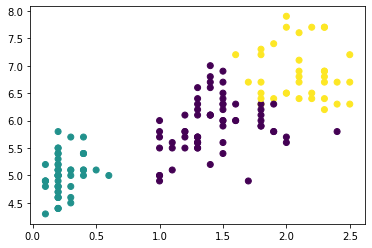

In [22]:
dims=[1,2]
plt.scatter(x.values[:,dims[0]],x.values[:,dims[1]],c=clusters_pred)
 

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

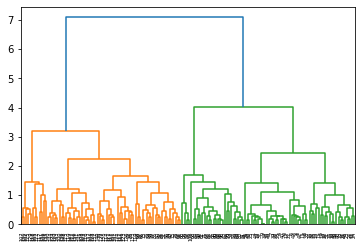

In [24]:
hier=linkage(x,method="complete")
dendrogram(hier)

plt.show()

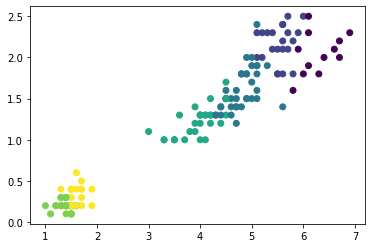

In [27]:
dims=[0,1]
plt.scatter(x.values[:,dims[0]],x.values[:,dims[1]],c= fcluster(hier,2,criterion="distance"))

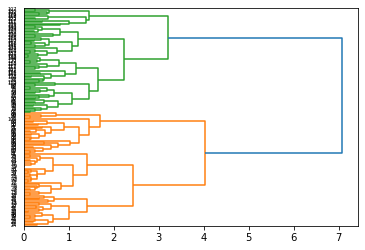

In [28]:
dendrogram(linkage(x,method="complete"),orientation="right",distance_sort="descending",show_leaf_counts=True);

### DBSCAN

In [50]:
model=cluster.DBSCAN(eps=1,min_samples=4)
model.fit(x) 
 

DBSCAN(eps=1, min_samples=4)

In [51]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

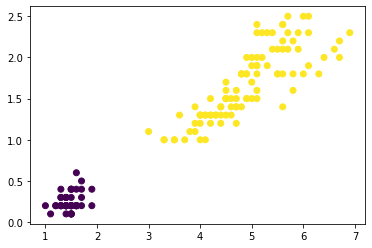

In [52]:
dims=[0,1]
plt.scatter(x.values[:,dims[0]],x.values[:,dims[1]],c= model.labels_)

### MeanShift

In [53]:
model=cluster.MeanShift()  #default bandwidth
model.fit(x) 


MeanShift()

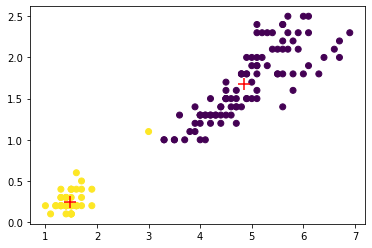

In [54]:
dims=[0,1]
plt.scatter(x.values[:,dims[0]],x.values[:,dims[1]],c=model.labels_)
plt.scatter(model.cluster_centers_[:,dims[0]],model.cluster_centers_[:,dims[1]],marker="+",c="red",s=150)
plt.show()

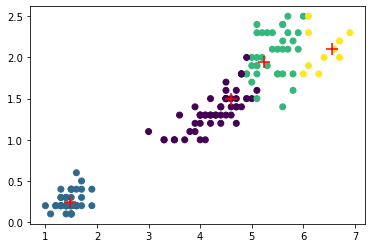

In [59]:
model=cluster.MeanShift(bandwidth=.8)
#change the bandwith
model.fit(x) 

dims=[0,1]
plt.scatter(x.values[:,dims[0]],x.values[:,dims[1]],c=model.labels_)
plt.scatter(model.cluster_centers_[:,dims[0]],model.cluster_centers_[:,dims[1]],marker="+",c="red",s=150)
plt.show()

### non-linear pattern with different methods

In [61]:
from sklearn.datasets import make_circles


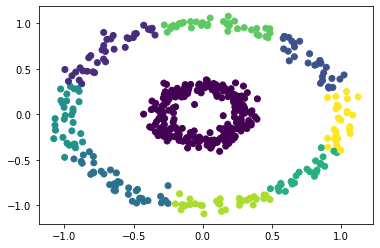

In [73]:

x,y=make_circles(n_samples=500,noise=.05,factor=.3)


model=cluster.MeanShift(bandwidth=0.55)
#change bandwith
model.fit(x) 

plt.scatter(x[:,0],x[:,1],c=model.labels_)
plt.show()

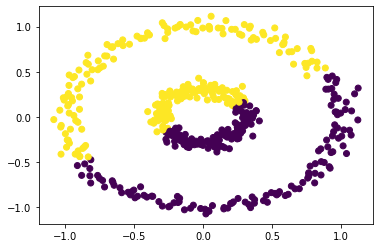

In [77]:

x,y=make_circles(n_samples=500,noise=.05,factor=.3)


model=cluster.KMeans(n_clusters=2)
#change number of clusters
model.fit(x) 

plt.scatter(x[:,0],x[:,1],c=model.labels_)
plt.show()

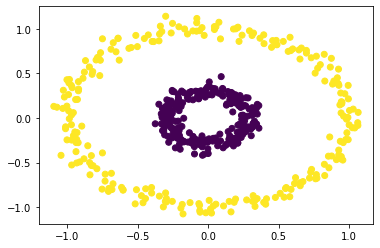

In [82]:

x,y=make_circles(n_samples=500,noise=.05,factor=.3)


model=cluster.DBSCAN(eps=.3,min_samples=5)
#increase eps and see what happens
model.fit(x) 

plt.scatter(x[:,0],x[:,1],c=model.labels_)
plt.show()